In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()
from sklearn.cluster import KMeans

In [46]:
data = pd.read_csv("/Users/Adeliya/OneDrive/клъстеризация/output.csv",low_memory=False)

In [47]:
#real=data.replace(',',';')
#real.to_excel('real.xlsx',index=False)

In [48]:
#sum=(data["Скорост"]>70).sum()
#print(sum)

In [51]:
selected_columns=['Скорост','Тегло']
data_selected=data[data['Тегло']>0]
data_selected=data_selected[selected_columns]


In [52]:
data_selected=data_selected.replace(0,np.nan)

In [53]:
data_selected=data_selected.dropna()

In [54]:
from sklearn.ensemble import IsolationForest

#model = IsolationForest(contamination=0.1)
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=10, contamination=0.1)

model.fit(data_selected)
predictions=model.predict(data_selected)

cleaned_df=data_selected[predictions==1]
data_selected.count()-cleaned_df.count()

#data_selected[predictions==-1]

Скорост    74179
Тегло      74179
dtype: int64

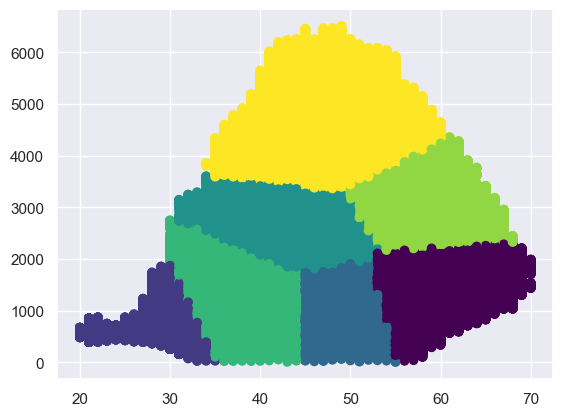

In [63]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()
from sklearn.cluster import KMeans
scaler = StandardScaler()
data_standardized = scaler.fit_transform(cleaned_df)
kmeans=KMeans(7)
kmeans.fit(data_standardized)
identified_clusters=kmeans.fit_predict(data_standardized)
data_with_clusters=cleaned_df.copy()
data_with_clusters['Cluster']=identified_clusters
plt.scatter(data_with_clusters['Скорост'],data_with_clusters['Тегло'],c=data_with_clusters['Cluster'],cmap= 'viridis')
plt.show()

In [60]:
identified_clusters

array([6, 5, 4, ..., 5, 3, 4])

In [61]:
def the_elbow_method(data):
    #data = pd.read_csv("output.csv",low_memory=False)
    #data = data[~data[:].isnull()] 
    #x=data.iloc[:,[2,6]]
    kmeans=KMeans(4)
    kmeans.fit(data)
    wcss=[]
    for i in range(1,20):
        kmeans=KMeans(i)
        kmeans.fit(data)
        wcss_iter=kmeans.inertia_
        wcss.append(wcss_iter)
    number_cluster = range(1,20)
    plt.plot(number_cluster,wcss)
    plt.xticks(range(1,20,2))
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')

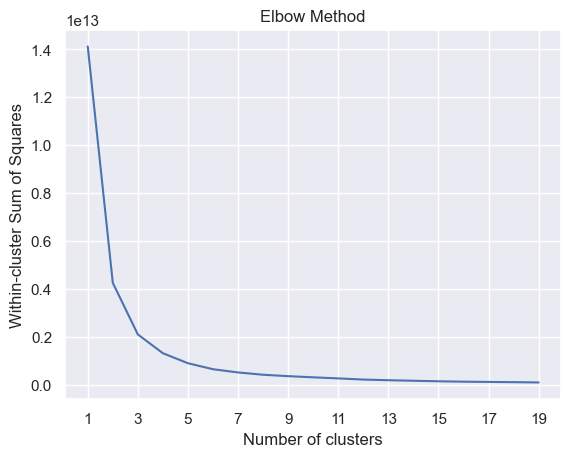

In [62]:
the_elbow_method(data_selected)